In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
import shap

In [2]:
df = pd.read_table('classify_2fold.txt')
#选择需要的feature
target = df['editing']
onehot = pd.get_dummies(df.iloc[:,:10])
data = df['MFE']
feature = pd.concat([onehot,data],axis = 1)
feature

,base-2,base_-1,base_1,base_3,base_4,base_2,srd_str_f,srd_str_h,srd_str_i,srd_str_m,...,all6sites_EEDEEE,all6sites_EEEDDD,all6sites_EEEDDE,all6sites_EEEDED,all6sites_EEEDEE,all6sites_EEEEDD,all6sites_EEEEDE,all6sites_EEEEED,all6sites_EEEEEE,MFE
0,1,0,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-18.7
1,1,1,1,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,-9.7
2,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,-14.4
3,0,1,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-12.1
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,-20.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112738,0,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-12.2
112739,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,-4.7
112740,1,1,1,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,-7.2
112741,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,-5.5


In [3]:
x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2022)
dtrain = xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)
dtrain = xgb.DMatrix(x_train,y_train)
dtest=xgb.DMatrix(x_test,y_test)

params = {
    'nthread': 12,
    'learning_rate' : 0.1,
     'objective': 'binary:logistic'
}
params['eval_metric'] = ["error","auc","aucpr"]
num_rounds = 91
evallist = [(dtest, 'eval'), (dtrain, 'train')]


model = xgb.train(params,dtrain,num_rounds,evals=evallist,early_stopping_rounds=10)


[0]	eval-error:0.10369	eval-auc:0.94832	eval-aucpr:0.90476	train-error:0.10373	train-auc:0.94822	train-aucpr:0.90596
[1]	eval-error:0.10191	eval-auc:0.95561	eval-aucpr:0.90930	train-error:0.10243	train-auc:0.95515	train-aucpr:0.91119
[2]	eval-error:0.10129	eval-auc:0.95632	eval-aucpr:0.91220	train-error:0.10227	train-auc:0.95568	train-aucpr:0.91327
[3]	eval-error:0.09952	eval-auc:0.95803	eval-aucpr:0.91340	train-error:0.09946	train-auc:0.95753	train-aucpr:0.91450
[4]	eval-error:0.09885	eval-auc:0.95957	eval-aucpr:0.91492	train-error:0.09926	train-auc:0.95886	train-aucpr:0.91572
[5]	eval-error:0.09867	eval-auc:0.96049	eval-aucpr:0.91657	train-error:0.09914	train-auc:0.95983	train-aucpr:0.91754
[6]	eval-error:0.09748	eval-auc:0.96083	eval-aucpr:0.91716	train-error:0.09848	train-auc:0.96005	train-aucpr:0.91786
[7]	eval-error:0.09739	eval-auc:0.96124	eval-aucpr:0.91766	train-error:0.09847	train-auc:0.96053	train-aucpr:0.91845
[8]	eval-error:0.09708	eval-auc:0.96139	eval-aucpr:0.91779	train

[70]	eval-error:0.09433	eval-auc:0.96479	eval-aucpr:0.92529	train-error:0.09419	train-auc:0.96552	train-aucpr:0.92983
[71]	eval-error:0.09411	eval-auc:0.96479	eval-aucpr:0.92529	train-error:0.09422	train-auc:0.96552	train-aucpr:0.92985
[72]	eval-error:0.09411	eval-auc:0.96478	eval-aucpr:0.92528	train-error:0.09417	train-auc:0.96553	train-aucpr:0.92986
[73]	eval-error:0.09411	eval-auc:0.96478	eval-aucpr:0.92527	train-error:0.09415	train-auc:0.96556	train-aucpr:0.92991
[74]	eval-error:0.09411	eval-auc:0.96478	eval-aucpr:0.92522	train-error:0.09415	train-auc:0.96557	train-aucpr:0.92994
[75]	eval-error:0.09415	eval-auc:0.96477	eval-aucpr:0.92520	train-error:0.09415	train-auc:0.96559	train-aucpr:0.93000
[76]	eval-error:0.09411	eval-auc:0.96476	eval-aucpr:0.92516	train-error:0.09414	train-auc:0.96562	train-aucpr:0.93006
[77]	eval-error:0.09411	eval-auc:0.96475	eval-aucpr:0.92521	train-error:0.09415	train-auc:0.96563	train-aucpr:0.93009
[78]	eval-error:0.09406	eval-auc:0.96475	eval-aucpr:0.92

In [4]:
test_pred = model.predict(dtest)
train_pred=model.predict(dtrain)

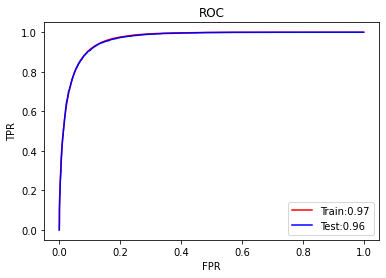

In [7]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(y_train,train_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(y_test,test_pred)

auroc_train=roc_auc_score(y_train,train_pred)
auroc_test=roc_auc_score(y_test,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()
plt.savefig("classify.roc.pdf", format='pdf',dpi=600,bbox_inches="tight")

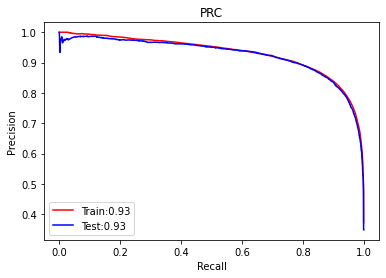

In [8]:
## PRC 
## PRC only valid for binary outcomes. 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(y_train,train_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(y_test,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()
plt.savefig("classify.pr.pdf", format='pdf',dpi=600,bbox_inches="tight")

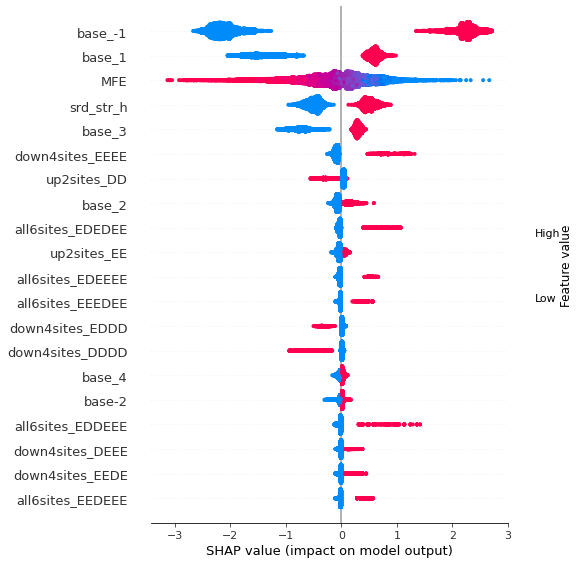

In [5]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values,x_test,show=False)
plt.savefig("classify.shap.pdf", format='pdf',dpi=600,bbox_inches="tight")

In [11]:
y_base = explainer.expected_value
print(y_base)

pred = model.predict(xgboost.DMatrix(X))
print(pred.mean())的撒v发

-0.9080078


NameError: name 'xgboost' is not defined

In [10]:
y_test=pd.DataFrame(y_train)
max_index=y_test.index[y_test['editing'] == min(y_test['editing'])]
max_row=y_test.index.get_loc(max_index[0])
#g visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[max_row,:], x_test.iloc[max_row,:])

In [10]:
mean_abs_shap_vals=np.mean(abs(shap_values),axis=0)
features=x_test.columns
shap_dict=pd.DataFrame({'feature':features,
          'mean_abs_shap':mean_abs_shap_vals})
shap_dict.to_csv("classify_2fold_shap_mean_abs.txt",index=False,sep='\t')

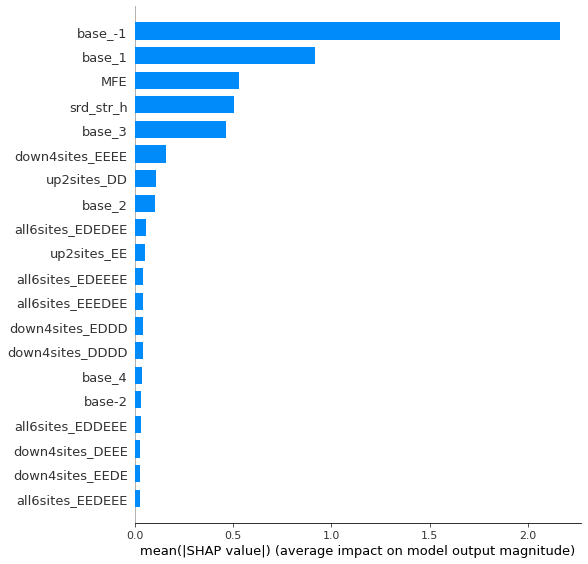

In [11]:
shap.summary_plot(shap_values, x_test, plot_type="bar",max_display=20,show=False)
plt.savefig("classify.bar.pdf", format='pdf',dpi=600,bbox_inches="tight")